# Clustering: Hierarchical

In [42]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering as HClust
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

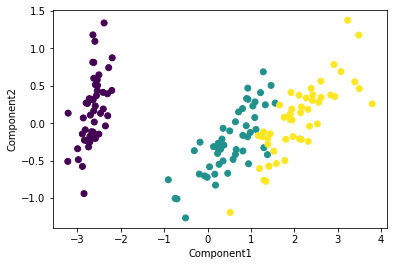

In [43]:
# Visualize the examples in 2D busing PCA - Principal Components Analysis

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

red_X = PCA(n_components=2).fit_transform(X)

plt.scatter(red_X[:,0],red_X[:,1],c=y)

plt.xlabel('Component1')
plt.ylabel('Component2')

plt.show()

## Agglomerative clustering without a pre-defined number of clusters

Hierarchical clustering enables clustering the data without a pre-defined number of clusters. The result is a hierarchy that can be visualised as a dendrogram.

For that, HClust must be called with the parameter `distance_thershold`. This forces the production of the information that is needed for the dendrogram.

In [72]:
hclust = HClust(distance_threshold=0, n_clusters=None)
hclust.fit(X)
#print(hclust.labels_)
#print(hclust.distances_)
#print(hclust.children_)
hclust.linkage

'ward'

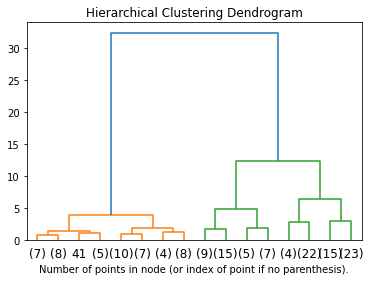

In [75]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(hclust, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


## Setting the number of clusters

We can use Hierarchical Clustering for finding a predefined number of clusters just as in kmeans. In that case the tree is built until we have the desired number of clusters and the process stops.

In [34]:
hclust = HClust(n_clusters=3)
hclust.fit(X)
hclust.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

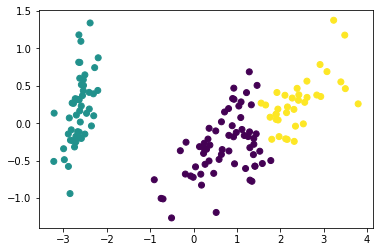

In [35]:
plt.scatter(red_X[:,0],red_X[:,1],c=hclust.labels_)

## Trying different link strategies

The parameter `linkage` defines the linkage strategy: `complete` or maximum linkage; `single` or minimum linkage; `average` linkage; `ward` linkage.

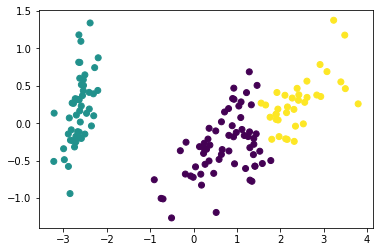

In [79]:
hclust = HClust(n_clusters=3,linkage='ward')
hclust.fit(X)
plt.scatter(red_X[:,0],red_X[:,1],c=hclust.labels_)